In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

In [2]:
# csv has been upload on the repo. It is exported from neighborhood database
df = pd.read_csv('/Users/apple/Desktop/PUI2017/HW8_yl5240/geolytics_nyc_pop_income_house_2010.csv')

In [3]:
df.head()

,AREAKEY,TRCTPOP1,MDFAMY1A,MDVALHS1A
0,36005000100,11091,0,0
1,36005000200,4334,58368,392500
2,36005000400,5503,73148,393700
3,36005001600,5643,33555,378100
4,36005001900,1917,25489,0


In [4]:
df.columns  = ['census_tract', 'Population', 'Median_family_income', 'Median_house_value']
df.head()

,census_tract,Population,Median_family_income,Median_house_value
0,36005000100,11091,0,0
1,36005000200,4334,58368,392500
2,36005000400,5503,73148,393700
3,36005001600,5643,33555,378100
4,36005001900,1917,25489,0


In [5]:
df.shape

(2168, 4)

In [6]:
df1 = df[(df.Median_family_income > 0)&(df.Median_house_value>0)].reset_index(drop = True)
df1.shape

(2000, 4)

In [7]:
str(df.iloc[0,0]).startswith('36005')

True

In [33]:
for i in df1.index:
    if str(df1.loc[i,'census_tract']).startswith('36005'):
        df1.loc[i,'Borough'] = 'Bronx'
        df1.loc[i,'color'] = 'b'
    elif str(df1.loc[i,'census_tract']).startswith('36047'):
        df1.loc[i,'Borough'] = 'Brooklyn'
        df1.loc[i,'color'] = 'g'
    elif str(df1.loc[i,'census_tract']).startswith('36061'):
        df1.loc[i,'Borough'] = 'Manhattan'
        df1.loc[i,'color'] = 'r'
    elif str(df1.loc[i,'census_tract']).startswith('36081'):
        df1.loc[i,'Borough'] = 'Queens'
        df1.loc[i,'color'] = 'c'
    elif str(df1.loc[i,'census_tract']).startswith('36085'):
        df1.loc[i,'Borough'] = 'Staten Island'
        df1.loc[i,'color'] = 'm'

In [34]:
df1.head()

,census_tract,Population,Median_family_income,Median_house_value,Borough,color
0,36005000200,4334,58368,392500,Bronx,b
1,36005000400,5503,73148,393700,Bronx,b
2,36005001600,5643,33555,378100,Bronx,b
3,36005002000,8731,30817,398100,Bronx,b
4,36005002500,5491,17048,381300,Bronx,b


In [35]:
df1.describe()

,census_tract,Population,Median_family_income,Median_house_value
count,2.000000e+03,2000.00000,2000.000000,2.000000e+03
mean,3.605564e+10,3886.54500,68005.929500,5.327123e+05
std,2.546893e+07,2100.49912,40111.600298,1.946563e+05
min,3.600500e+10,105.00000,12294.000000,9.999000e+03
25%,3.604703e+10,2374.00000,41983.750000,4.194000e+05
50%,3.604712e+10,3493.00000,58574.000000,5.070000e+05
75%,3.608104e+10,4864.00000,81012.000000,6.329250e+05
max,3.608503e+10,26588.00000,250001.000000,1.000001e+06


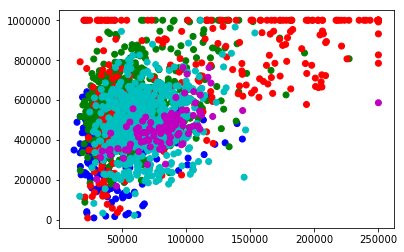

In [36]:
plt.scatter(df1.Median_family_income, df1.Median_house_value, c = df1.color)


In [77]:
df2 = pd.merge(df1.groupby(by = 'Borough').sum()['Population'].reset_index(),
           df1.groupby(by = ['Borough','color']).mean()[['Median_family_income',
                                                       'Median_house_value']].reset_index(),
          on = 'Borough')
df2

,Borough,Population,color,Median_family_income,Median_house_value
0,Bronx,1208537,b,47547.335664,381002.451049
1,Brooklyn,2412974,g,58564.499307,573662.721221
2,Manhattan,1472082,r,115063.004016,719027.590361
3,Queens,2213131,c,66962.017241,493680.565831
4,Staten Island,466366,m,83168.509434,460764.150943


In [92]:
(df2.Population/1000).astype(int).astype(str)

0    1208
1    2412
2    1472
3    2213
4     466
Name: Population, dtype: object

In [ ]:
# label = df2.Borough[i] + ' ' + (df2.Population[i]/1000).astype(int).astype(str) + 'K pop'

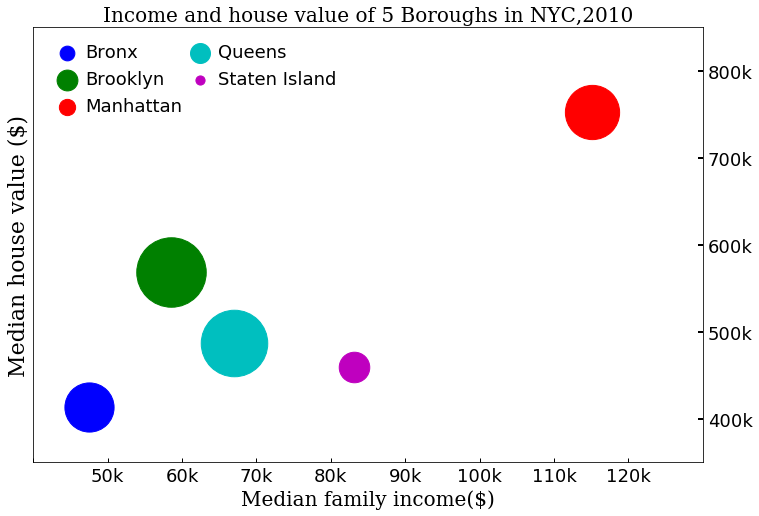

In [189]:
plt.figure(figsize = (12, 8))
for i in range(len(df2)):
    plt.scatter(df2.Median_family_income[i], df3.Median_house_value[i], 
            s = df2.Population[i]/500, 
                label = df2.Borough[i],
                c = df2.color[i])


plt.legend(loc= 2, prop= {'size': 18}, fontsize = 10, 
           markerscale = 0.3, 
           handletextpad = 0,columnspacing = 0,
           ncol = 2,
           frameon = False)

plt.xlim(40000,130000)
plt.xticks(np.arange(40000,130000,10000), ('', '50k', '60k','70k','80k','90k','100k','110k','120k',''))
plt.ylim(350000,850000)
plt.yticks(np.arange(400000,900000,100000), ('400k', 
                                             '500k','600k','700k','800k',''))
plt.tick_params(axis='y', pad = 5, direction = 'in', 
                length = 5, width = 2,
               left = False, right = True, labelleft = False, labelright = True)
plt.tick_params(axis='x', pad = 5, direction = 'in', 
                length = 4, width = 1)

font = {'family' : 'serif',  
        'color'  : 'k',  
        'weight' : 'normal',  
        'size'   : 20,  
        }  

plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.xlabel('Median family income($)', fontsize = 20, fontdict = font)
plt.ylabel('Median house value ($)', fontsize = 22, fontdict = font)
plt.title('Income and house value of 5 Boroughs in NYC,2010', 
          fontdict = font)
plt.show()

In [68]:
plt.legend?

In [126]:
plt.title?